<a href="https://colab.research.google.com/github/adias311/python-tv-show-analysis/blob/main/tv_show_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Statistika Deskriptif**

In [2]:
npm = 202243501173
name = "Adias Afnan Valentino"
Class = "R6L"

print("NPM :", npm, "\nNama :", name , "\nKelas : ", Class)


NPM : 202243501173 
Nama : Adias Afnan Valentino 
Kelas :  R6L


**a**) *Buatlah Statistika Deskriptif dari data tersebut dengan menggunakan pandas*

In [3]:
# import EDA library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data_tv_show = "https://raw.githubusercontent.com/adias311/python-tv-show-analysis/main/tv_show.csv"

# show dataframe
df = pd.read_csv(data_tv_show)
df.head(73-(28+32))

,titleId,seasonNumber,title,date,av_rating,share,genres
0,tt0806901,44,Polizeiruf 110,2015,7.0000,0.00,"Crime,Drama"
1,tt0806901,40,Polizeiruf 110,2011,7.3595,0.02,"Crime,Drama"
2,tt0806901,39,Polizeiruf 110,2010,7.2000,0.01,"Crime,Drama"
3,tt0203259,20,Law & Order: Special Victims Unit,2018,8.6219,0.07,"Crime,Drama,Mystery"
4,tt0098844,20,Law & Order,2010,7.8286,0.28,"Crime,Drama,Mystery"
5,tt0203259,19,Law & Order: Special Victims Unit,2018,8.7060,0.63,"Crime,Drama,Mystery"
6,tt0098844,19,Law & Order,2009,7.7893,0.29,"Crime,Drama,Mystery"
7,tt0118401,19,Midsomer Murders,2017,7.3916,0.05,"Crime,Drama,Mystery"
8,tt0098844,18,Law & Order,2008,7.8470,0.31,"Crime,Drama,Mystery"
9,tt0203259,18,Law & Order: Special Victims Unit,2017,8.0010,0.28,"Crime,Drama,Mystery"


In [5]:
# find duplicate rows
duplicate_rows_df = df[df.duplicated()]
print("baris yang memiliki duplikat : ", duplicate_rows_df.shape)

# show duplicate rows by titleId
if not duplicate_rows_df.empty:
    duplicate_title_ids = duplicate_rows_df["titleId"].unique()
    result = df[df["titleId"].isin(duplicate_title_ids)]
    print(result)
else:
    print("Tidak ada data duplikat.")

# delete duplicate data
df = df.drop_duplicates()

baris yang memiliki duplikat :  (1, 7)
        titleId  seasonNumber         title  date  av_rating  share  \
1558  tt3487410             1  The Whispers  2015     7.8569   0.14   
1559  tt3487410             1  The Whispers  2015     7.8569   0.14   

                    genres  
1558  Drama,Horror,Mystery  
1559  Drama,Horror,Mystery  


*   **Pemusatan Data :**  Menggambarkan dimana data berpusat (mean, median, min, max, ...)
*   **Persebaran Data :** Menggambarkan seberapa tersebar data tersebut di sekitar nilai pemusatan (standar deviasi, varians, ...)

In [6]:
## Descriptive Stats
# Statistik untuk kolom/atribut data numerik/kuantitatif tv show

rename_dict = {
    "count": "Jumlah Data",
    "mean": "Rata-rata",
    "std": "Standar Deviasi",
    "min": "Nilai Minimum",
    "25%": "Kuartil Pertama",
    "50%": "Median",
    "75%": "Kuartil Ketiga",
    "max": "Nilai Maksimum",
}

df1 = df.drop(columns=["titleId", "title", "genres"])

desc = df1.describe(include="all")
desc.loc["modus"] = df1.mode().iloc[0]
desc.loc["Varians"] = df1.var()

desc = desc.rename(index=rename_dict).round(2)
print("\nStatistik untuk kolom/atribut data numerik/kuantitatif tv show : \n\n", desc)


Statistik untuk kolom/atribut data numerik/kuantitatif tv show : 

                  seasonNumber     date  av_rating    share
Jumlah Data           1633.00  1633.00    1633.00  1633.00
Rata-rata                3.14  2014.00       8.11     0.67
Standar Deviasi          3.27     2.96       0.65     1.47
Nilai Minimum            1.00  2008.00       2.70     0.00
Kuartil Pertama          1.00  2012.00       7.77     0.08
Median                   2.00  2015.00       8.16     0.22
Kuartil Ketiga           4.00  2017.00       8.53     0.63
Nilai Maksimum          44.00  2018.00       9.55    18.95
modus                    1.00  2017.00       7.50     0.01
Varians                 10.71     8.77       0.42     2.17


In [8]:
# Statistik untuk kolom/atribut data kategorial/kualitatif tv show

rename_dict = {
    "count": "Jumlah Data",
    "unique": "Jumlah Unik",
    "top": "Nilai Terbanyak",
    "freq": "Frekuensi Nilai Terbanyak"
}

desc_nominal = df[['title', 'genres']].describe(include=['object'])
desc_nominal = desc_nominal.rename(index=rename_dict)

print("\nStatistik untuk kolom/atribut data kategorial/kualitatif TV Show:\n")
print(desc_nominal)


Statistik untuk kolom/atribut data kategorial/kualitatif TV Show:

                                    title               genres
Jumlah Data                          1633                 1633
Jumlah Unik                           708                   92
Nilai Terbanyak            Grey's Anatomy  Crime,Drama,Mystery
Frekuensi Nilai Terbanyak              12                  248


**b)**	*Buatlah scatter plot yang menampilkan hubungan antara peringkat rata-rata (x) dan jumlah musim (y) dengan menggunakan  pandas.*

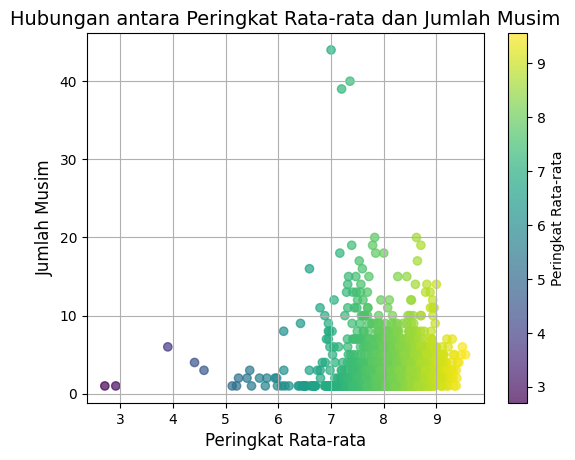

In [ ]:
# Scatter plot untuk rata-rata rating dan jumlah total musim
scatter = plt.scatter(df['av_rating'], df['seasonNumber'], c=df['av_rating'], cmap='viridis', alpha=0.7)

plt.colorbar(scatter, label='Peringkat Rata-rata')
plt.title('Hubungan antara Peringkat Rata-rata dan Jumlah Musim', fontsize=14)
plt.xlabel('Peringkat Rata-rata', fontsize=12)
plt.ylabel('Jumlah Musim', fontsize=12)

plt.grid(True)
plt.show()